In [79]:
# Importing the required libraries and packages:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [80]:
# Importing the dataset:
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


Data cleaning and validation

1. Missing values

In [82]:
# Identify missing values
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [83]:
# Handling the missing values in the revenue column
# Calculate mean values of revenue for each sales method category
mean_values = df.groupby('sales_method')['revenue'].mean()
mean_values = round(mean_values,2)
mean_values

sales_method
Call             47.60
Email            97.13
Email + Call    183.74
em + call       173.48
email            98.15
Name: revenue, dtype: float64

In [84]:
# Group by sales_method and calculate mean and median
mean_rev = df.groupby('sales_method')['revenue'].agg(['mean', 'median'])
mean_rev = round(mean_rev,2)
mean_rev


,mean,median
sales_method,,
Call,47.60,49.07
Email,97.13,95.58
Email + Call,183.74,184.77
em + call,173.48,181.27
email,98.15,95.39


In [85]:
mean_rev = mean_rev.rename(columns= {'mean':'mean_revenue','median':'median_revenue'})
mean_rev

,mean_revenue,median_revenue
sales_method,,
Call,47.60,49.07
Email,97.13,95.58
Email + Call,183.74,184.77
em + call,173.48,181.27
email,98.15,95.39


To impute missing values in the revenue column with the mean revenue of each sales_method category, you can use the groupby().transform() method in pandas.

In [86]:
df['revenue'] = df['revenue'].fillna(
    df.groupby('sales_method')['revenue'].transform('mean')
)

In [87]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,97.126645,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.470000,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.550000,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,97.126645,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.490000,0,28,Illinois


In [88]:
# Display the missing value summary
df.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

2. Duplicate values

In [89]:
# Identify duplicate value:
df[df.duplicated(keep=False)]


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [90]:
# Identify inconsistent format in week column
df.week.value_counts().to_frame().reset_index()

,week,count
0,1,3721
1,4,2575
2,5,2574
3,2,2491
4,3,2411
5,6,1228


In [91]:
# Identify inconsistent format in sales_method column
df.sales_method.value_counts().to_frame().reset_index()

,sales_method,count
0,Email,7456
1,Call,4962
2,Email + Call,2549
3,em + call,23
4,email,10


In [92]:
# Handling inconsistent categorical data in sales_method column
# Handling inconsistency by replacing 'email' with 'Email' and 'em + call' with 'Email + Call'
df['sales_method'] = df['sales_method'].str.replace('email','Email', regex = True)
df['sales_method'] = df['sales_method'].str.replace('em \+ call', 'Email + Call', regex = True)

In [93]:
df.sales_method.value_counts().to_frame().reset_index()

,sales_method,count
0,Email,7466
1,Call,4962
2,Email + Call,2572


In [94]:
# Identify inconsistent format in nb_sold column
df.nb_sold.value_counts().to_frame().reset_index()

,nb_sold,count
0,10,3677
1,9,3535
2,11,2439
3,8,1941
4,12,1088
5,13,939
6,7,698
7,15,555
8,14,97
9,16,31


In [95]:
# Identify inconsistent format in years_as_customer column
df.years_as_customer.value_counts().to_frame().reset_index()

,years_as_customer,count
0,1,2504
1,2,1987
2,3,1619
3,0,1471
4,4,1338
5,5,1118
6,6,918
7,7,709
8,8,608
9,9,509


In [96]:

pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [97]:
import plotly.express as px

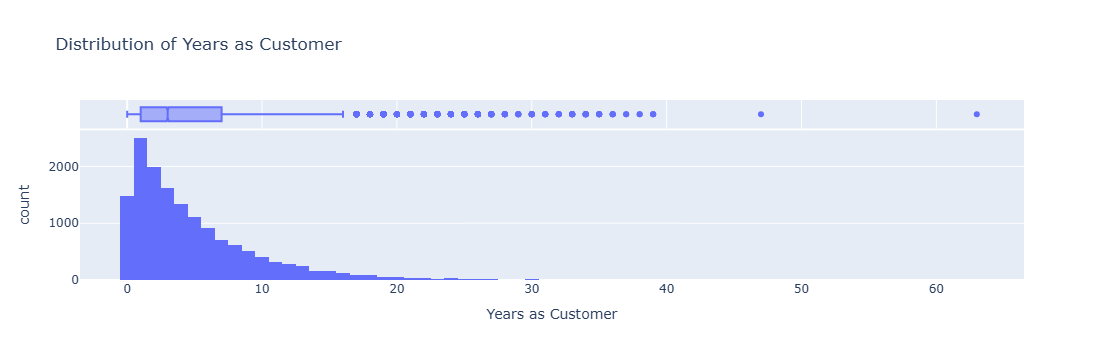

In [98]:
fig = px.histogram(df, 
                   x="years_as_customer", 
                   marginal="box", 
                   title='Distribution of Years as Customer',
                   labels={"years_as_customer": "Years as Customer"})

fig.show()

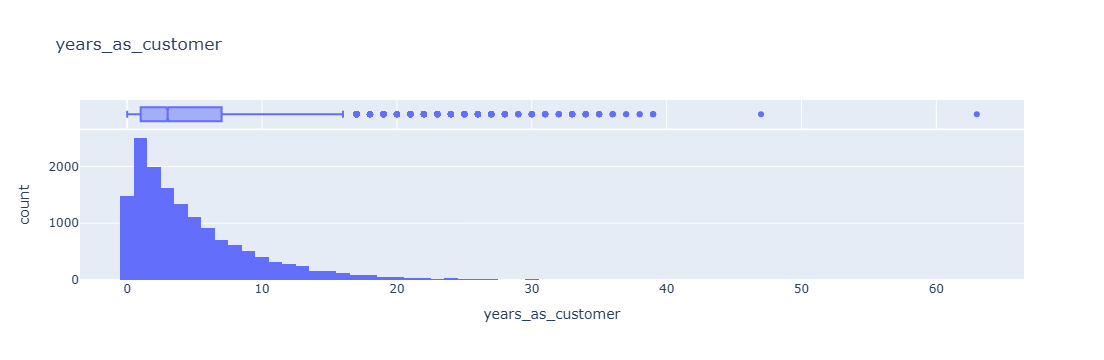

In [99]:
viz = df
fig = px.histogram(viz, x="years_as_customer", marginal="box", 
                   title=' years_as_customer')
fig.show()

In [100]:
df['years_as_customer']= df['years_as_customer'].apply(lambda x: min(x, 39))

In [101]:
df.years_as_customer.value_counts().to_frame().reset_index()

,years_as_customer,count
0,1,2504
1,2,1987
2,3,1619
3,0,1471
4,4,1338
5,5,1118
6,6,918
7,7,709
8,8,608
9,9,509


In [102]:
# Identify inconsistent format in nb_site_visits column
df.nb_site_visits.value_counts().to_frame().reset_index()

,nb_site_visits,count
0,25,1688
1,26,1645
2,24,1601
3,23,1478
4,27,1440
5,22,1200
6,28,1175
7,21,908
8,29,893
9,30,654


In [103]:
# Identify inconsistent format in state column
df.state.value_counts().to_frame().reset_index()

,state,count
0,California,1872
1,Texas,1187
2,New York,965
3,Florida,904
4,Illinois,617
5,Pennsylvania,598
6,Ohio,566
7,Michigan,498
8,Georgia,489
9,North Carolina,459


After the data validation process, the dataset contains 15000 rows and 8 columns. All of the missing values and inconsistent format have been handled properly, then we are able to move on to exploratory analysis.

Exploratory Data Analysis

1. How many customers were there for each approach?

In [104]:
# Calculate number of customers for each sales method
df.sales_method.value_counts().to_frame().reset_index()

,sales_method,count
0,Email,7466
1,Call,4962
2,Email + Call,2572


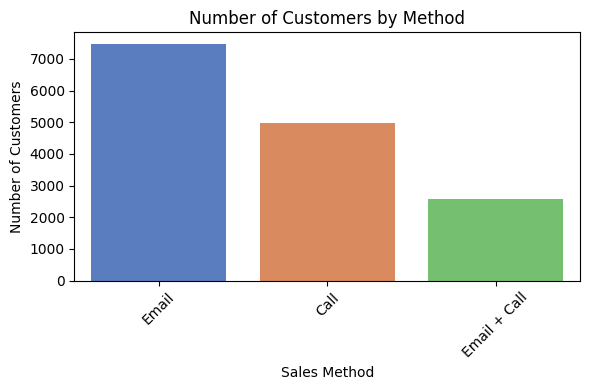

In [105]:
viz1 = df['sales_method'].value_counts().reset_index()
viz1.columns = ['sales_method', 'num_customers']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=viz1, x= 'sales_method', y='num_customers', palette='muted', legend = False)
plt.title('Number of Customers by Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The number of customers approached by call, email and combination of email and call respectively is 4962, 7466 and 2572.

2. What does the spread of the revenue look like overall? And for each method?

Overall revenue distribution:
To analyze the spread of revenue overall and by each method, you can use various techniques like calculating summary statistics (mean, median, standard deviation) and visualizing the distribution using box plots or histograms.

In [106]:
# Summary statistics for overall revenue
overall_revenue_stats = df['revenue'].describe()
overall_revenue_stats

count    15000.000000
mean        95.579256
std         47.957194
min         32.540000
25%         52.650000
50%         90.950000
75%        107.750000
max        238.320000
Name: revenue, dtype: float64

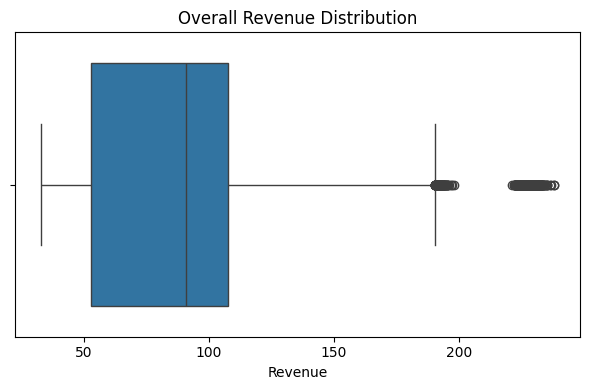

In [107]:
# Box Plot for overall revenue distribution
plt.figure(figsize = (6,4))
sns.boxplot(x = df['revenue'])
plt.title('Overall Revenue Distribution')
plt.xlabel('Revenue')
plt.tight_layout()
plt.show()

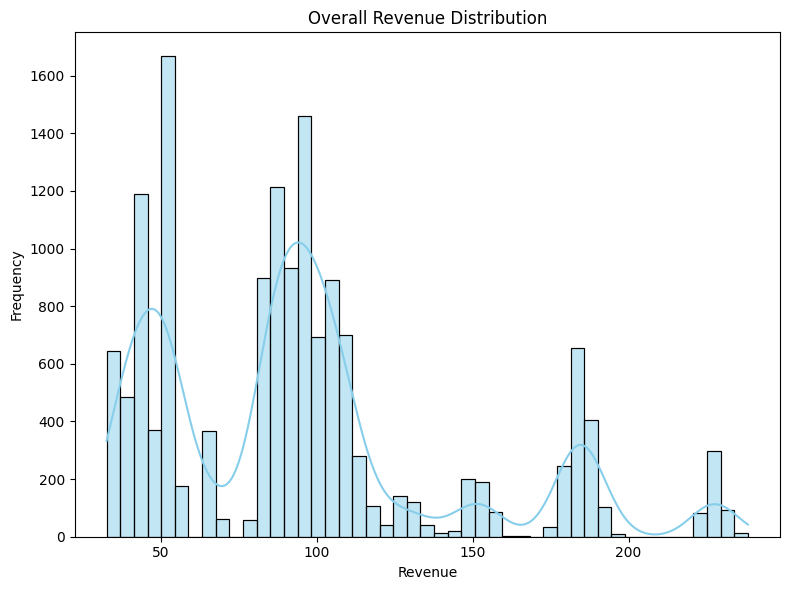

In [108]:
# Histogram for overall revenue distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['revenue'], kde=True, color='skyblue')
plt.title('Overall Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Revenue distribution for each of the sales method

In [109]:
# Summary statistics for revenue by sales method
revenue_by_sales_method_stats = df.groupby('sales_method')['revenue'].describe()
print("Revenue by Method Summary Statistics:\n", revenue_by_sales_method_stats)

Revenue by Method Summary Statistics:
                count        mean        std     min     25%         50%  \
sales_method                                                              
Call          4962.0   47.597467   8.451375   32.54   41.63   47.597467   
Email         7466.0   97.128021  10.794290   78.83   88.39   96.835000   
Email + Call  2572.0  183.651791  27.040219  122.11  176.33  183.743600   

                  75%     max  
sales_method                   
Call           52.590   71.36  
Email         104.460  148.97  
Email + Call  189.535  238.32  


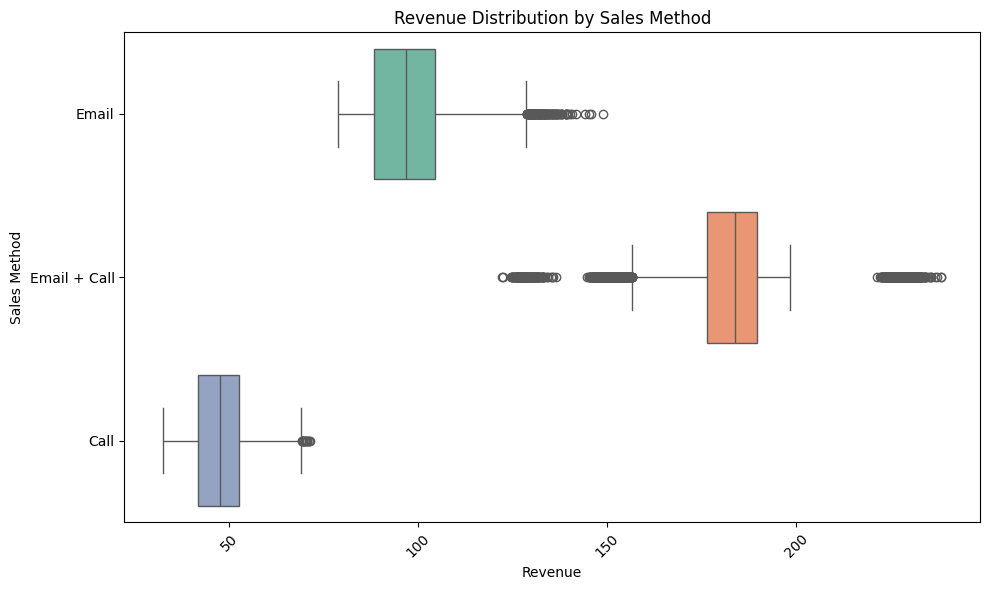

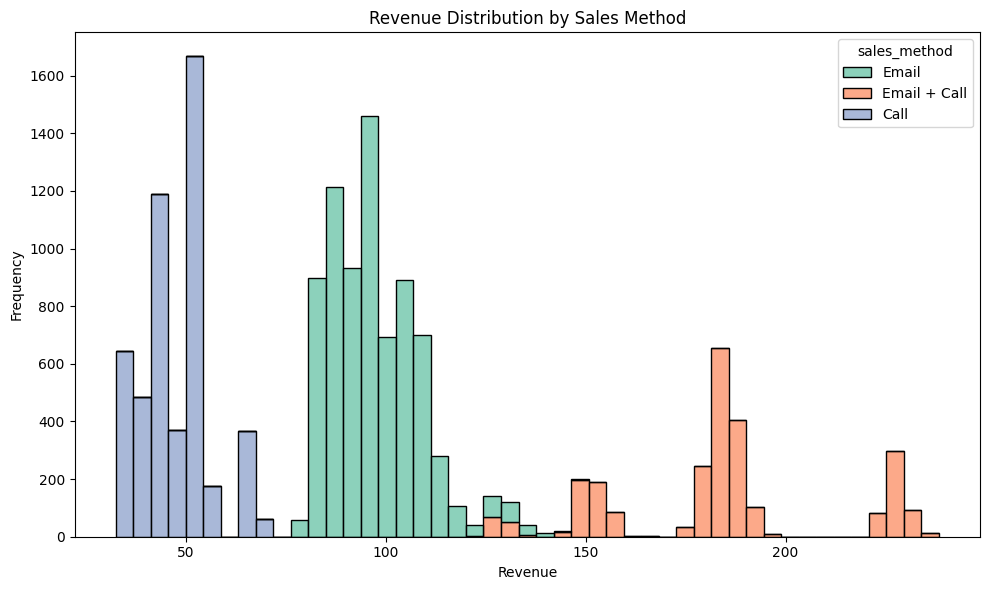

In [110]:
# Box Plot for revenue distribution by sales method
plt.figure(figsize =(10,6))
sns.boxplot(x = 'revenue', y ='sales_method', data = df, palette = 'Set2')
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Revenue')
plt.ylabel('Sales Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Histogram for revenue distribution by sales method
plt.figure(figsize =(10,6))
sns.histplot(data = df, x = 'revenue', hue = 'sales_method', multiple='stack',palette='Set2')
plt.title('Revenue Distribution by Sales Method')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


3. Was there any difference in revenue over time for each of the methods?

In [111]:
# Calculate total revenue for each sales method
revenue_by_sales_method = df.groupby('sales_method')['revenue'].sum()
revenue_by_sales_method = round(revenue_by_sales_method,2)
revenue_by_sales_method

sales_method
Call            236178.63
Email           725157.81
Email + Call    472352.41
Name: revenue, dtype: float64

a. Total revenue per week over the six-week period

In [112]:
total_revenue_per_week = df.groupby(['sales_method', 'week'])['revenue'].sum()
total_revenue_per_week = total_revenue_per_week.to_frame().reset_index()
total_revenue_per_week

,sales_method,week,revenue
0,Call,1,27015.934407
1,Call,2,35219.944012
2,Call,3,37865.583880
3,Call,4,51545.486149
4,Call,5,55279.216281
5,Call,6,29252.466808
6,Email,1,248122.485900
7,Email,2,148479.401943
8,Email,3,107047.904823
9,Email,4,116046.190104


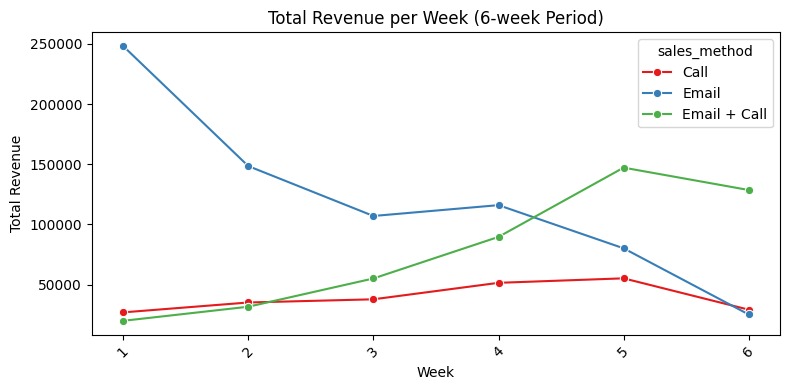

In [113]:
#Line chart of total revenue per week over the six week period
plt.figure(figsize = (8,4))
sns.lineplot(data = total_revenue_per_week, x = 'week', y = 'revenue', hue = 'sales_method', marker ='o', palette = 'Set1')
plt.title('Total Revenue per Week (6-week Period)')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average revenue per order over the six-week period

In [114]:
avg_revenue = df.groupby(['sales_method','week'])['revenue'].mean()
avg_revenue = avg_revenue.to_frame().reset_index()
avg_revenue 


,sales_method,week,revenue
0,Call,1,35.641074
1,Call,2,43.751483
2,Call,3,41.979583
3,Call,4,51.289041
4,Call,5,52.949441
5,Call,6,65.295685
6,Email,1,88.142979
7,Email,2,99.918844
8,Email,3,93.085135
9,Email,4,107.949944


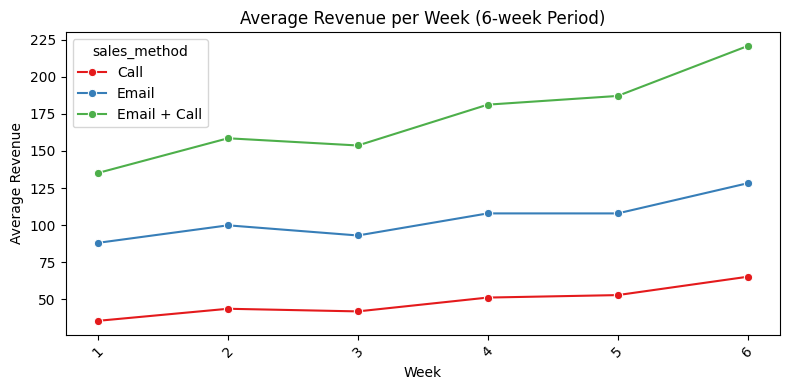

In [115]:
#Line chart of average revenue per week over the six week period
plt.figure(figsize = (8,4))
sns.lineplot(data = avg_revenue, x = 'week', y = 'revenue', hue = 'sales_method', marker ='o', palette = 'Set1')
plt.title('Average Revenue per Week (6-week Period)')
plt.xlabel('Week')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4. Based on the data, which method would you recommend to use?

Hypothesis testing is used to determine whether the differences in average revenue per order between sales strategies are due to chance or are indicative of real differences in performance. 
)

In [116]:
from statsmodels.stats.weightstats import ztest
# Revenue data
email_rev = df[df['sales_method'] == 'Email']['revenue']
call_rev = df[df['sales_method'] == 'Call']['revenue']
# Perform right-tailed z-test
z_test,p_value = ztest(email_rev, call_rev, value =0, alternative = 'larger')

print(f'Z-statistic: {z_test:.4f}')
print(f'P-value: {p_value:.4f}')



Z-statistic: 272.4551
P-value: 0.0000


In [117]:
from statsmodels.stats.weightstats import ztest
# Revenue data
email_call_rev = df[df['sales_method'] == 'Email + Call']['revenue']
email_rev = df[df['sales_method'] == 'Email']['revenue']
# Perform right-tailed z-test
z_test,p_value = ztest(email_call_rev, email_rev, value =0, alternative = 'larger')

print(f'Z-statistic: {z_test:.4f}')
print(f'P-value: {p_value:.4f}')



Z-statistic: 228.6301
P-value: 0.0000


5. Spread of the number of products sold for each sales method

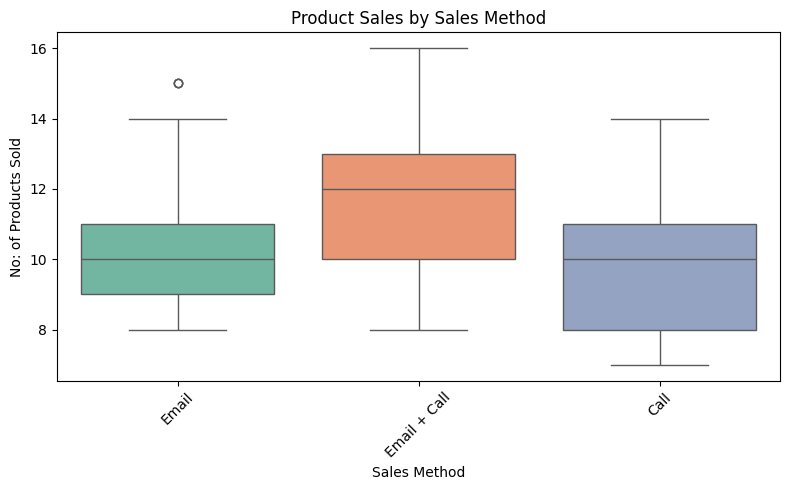

In [118]:
# Box Plot for no: of products sold by sales method
plt.figure(figsize =(8,5))
sns.boxplot(x = 'sales_method', y ='nb_sold', data = df, palette = 'Set2')
plt.title('Product Sales by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('No: of Products Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [119]:
# Summary statistics for no: of products sold by sales method
no_prod_by_sales_method_stats = df.groupby('sales_method')['nb_sold'].describe()
print("Sales Summary Statistics:\n", no_prod_by_sales_method_stats)

Sales Summary Statistics:
                count       mean       std  min   25%   50%   75%   max
sales_method                                                          
Call          4962.0   9.509674  1.733856  7.0   8.0  10.0  11.0  14.0
Email         7466.0   9.729306  1.179299  8.0   9.0  10.0  11.0  15.0
Email + Call  2572.0  12.225505  1.931459  8.0  10.0  12.0  13.0  16.0


Business Metrics
Keeping track of business metrics over time is essential for ensuring the sustainability and success of a business. 

In [120]:
# Calculate AOV & total revenue
aov_total_revenue = df.groupby('sales_method')['revenue'].agg(['mean','sum'])
aov_total_revenue = round(aov_total_revenue,2)
aov_total_revenue = aov_total_revenue.rename(columns={'sales_method': 'Sales Method', 'mean': 'AOV (USD/order)', 'sum': 'Total Revenue (USD)'})
aov_total_revenue


,AOV (USD/order),Total Revenue (USD)
sales_method,,
Call,47.60,236178.63
Email,97.13,725157.81
Email + Call,183.65,472352.41


2.  Average Basket Size (ABS)
Average basket size represents the average number of products sold in each customer’s order. This metric provides insights into customer behavior, such as whether customers are purchasing more items per order or if there are two or more products launched together as product bundling strategies. It can be calculated by dividing the total number of products sold for a certain period by the total number of orders in that period. It is the mean number of products sold.


In [121]:
abs_total_sold = df.groupby('sales_method')['nb_sold'].agg(['mean','sum'])
abs_total_sold = round(abs_total_sold, 2)
abs_total_sold = abs_total_sold.rename(columns={'sales_method': 'Sales Method', 'mean': 'ABS (unit/order)', 'sum': 'Total Products Sold (unit)'})
abs_total_sold


,ABS (unit/order),Total Products Sold (unit)
sales_method,,
Call,9.51,47187
Email,9.73,72639
Email + Call,12.23,31444


In [122]:
metrics = pd.concat([aov_total_revenue, abs_total_sold], axis=1)
metrics = metrics.reset_index()
metrics

,sales_method,AOV (USD/order),Total Revenue (USD),ABS (unit/order),Total Products Sold (unit)
0,Call,47.60,236178.63,9.51,47187
1,Email,97.13,725157.81,9.73,72639
2,Email + Call,183.65,472352.41,12.23,31444
